### Import Libraries

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
datasets = pd.read_csv("student_por.csv")

In [8]:
datasets.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [9]:
datasets.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [10]:
datasets.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [11]:
datasets.mean()

age           16.744222
Medu           2.514638
Fedu           2.306626
traveltime     1.568567
studytime      1.930663
failures       0.221880
famrel         3.930663
freetime       3.180277
goout          3.184900
Dalc           1.502311
Walc           2.280431
health         3.536210
absences       3.659476
G1            11.399076
G2            11.570108
G3            11.906009
dtype: float64

In [12]:
datasets.median()

age           17.0
Medu           2.0
Fedu           2.0
traveltime     1.0
studytime      2.0
failures       0.0
famrel         4.0
freetime       3.0
goout          3.0
Dalc           1.0
Walc           2.0
health         4.0
absences       2.0
G1            11.0
G2            11.0
G3            12.0
dtype: float64

In [13]:
datasets.mode()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,17,U,GT3,T,2,2,other,other,...,4,3,3,1,1,5,0,10,11,11


In [14]:
numeric = list(datasets._get_numeric_data().columns)

In [15]:
print(numeric)

['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [16]:
categorical = list(set(datasets.columns) - set(datasets._get_numeric_data().columns))

In [17]:
print(categorical)

['school', 'internet', 'nursery', 'Fjob', 'sex', 'reason', 'higher', 'famsup', 'activities', 'schoolsup', 'address', 'paid', 'Pstatus', 'guardian', 'romantic', 'famsize', 'Mjob']


### Analysing Data

In [19]:
datasets['average_marks'] = (datasets['G1'] + datasets['G2'] + datasets['G3'])/3

In [21]:
datasets['average_marks'].head()

0     7.333333
1    10.333333
2    12.333333
3    14.000000
4    12.333333
Name: average_marks, dtype: float64

### Categories The Students

In [22]:
def marks(average_marks):
    if (average_marks <=6):
        return('low')
    if average_marks >= 7 and average_marks <=14:
        return("average")
    elif average_marks >=15:
        return("high")

In [23]:
datasets['grades'] = datasets['average_marks'].apply(marks)

In [24]:
datasets['grades'].head()

0    average
1    average
2    average
3    average
4    average
Name: grades, dtype: object

In [25]:
datasets['grades'].value_counts()

average    505
high        86
low         16
Name: grades, dtype: int64

/opt/anaconda3/envs/DataScience/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


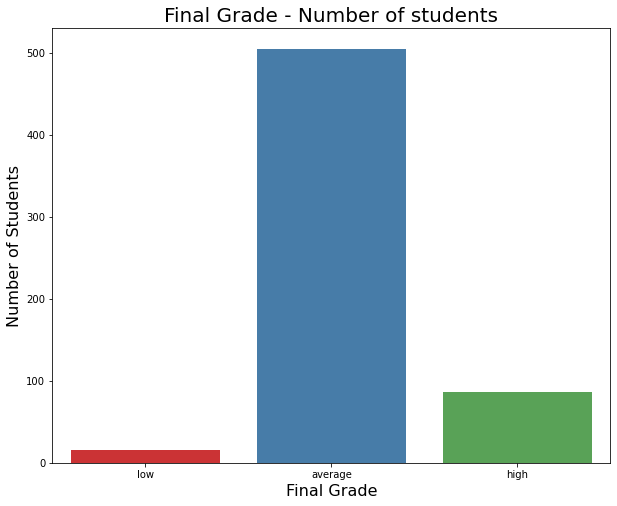

In [30]:
plt.figure(figsize = (10, 8))
sns.countplot(datasets['grades'], order =['low', 'average', 'high'], palette = 'Set1')
plt.title("Final Grade - Number of students", fontsize = 20)
plt.xlabel("Final Grade", fontsize = 16)
plt.ylabel("Number of Students", fontsize = 16)
plt.show()

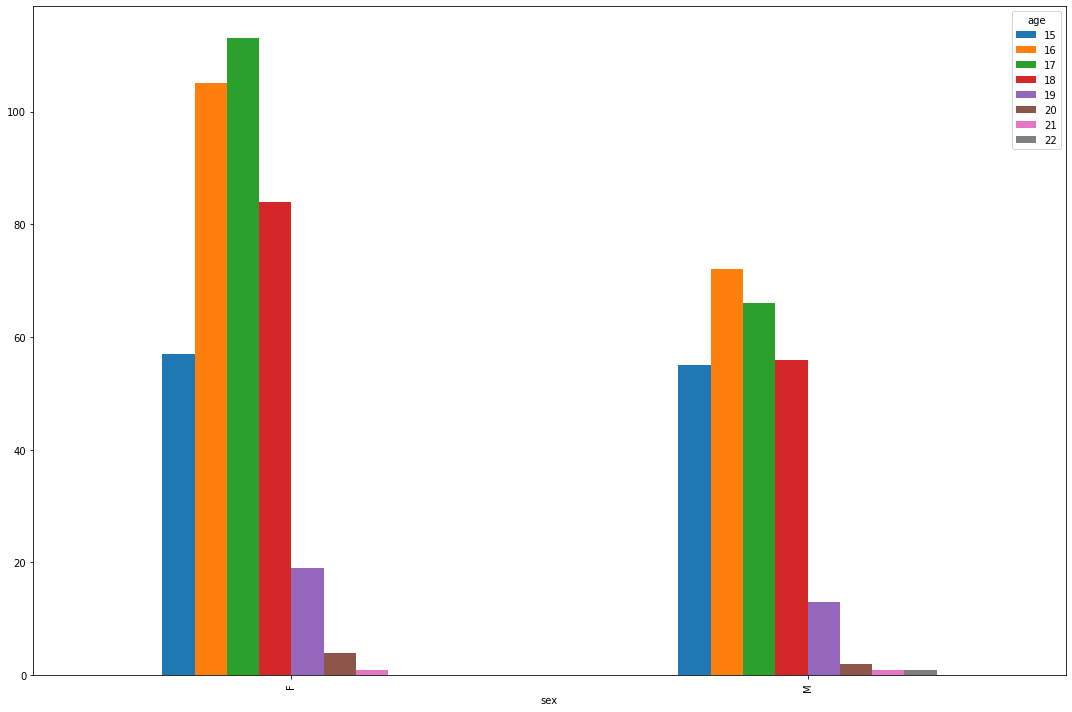

In [32]:
res = datasets.groupby(['sex','age']).size().unstack()
res.plot(kind= 'bar', figsize = (15, 10))
plt.tight_layout()
plt.show()

In [34]:
correlation = datasets.corr()

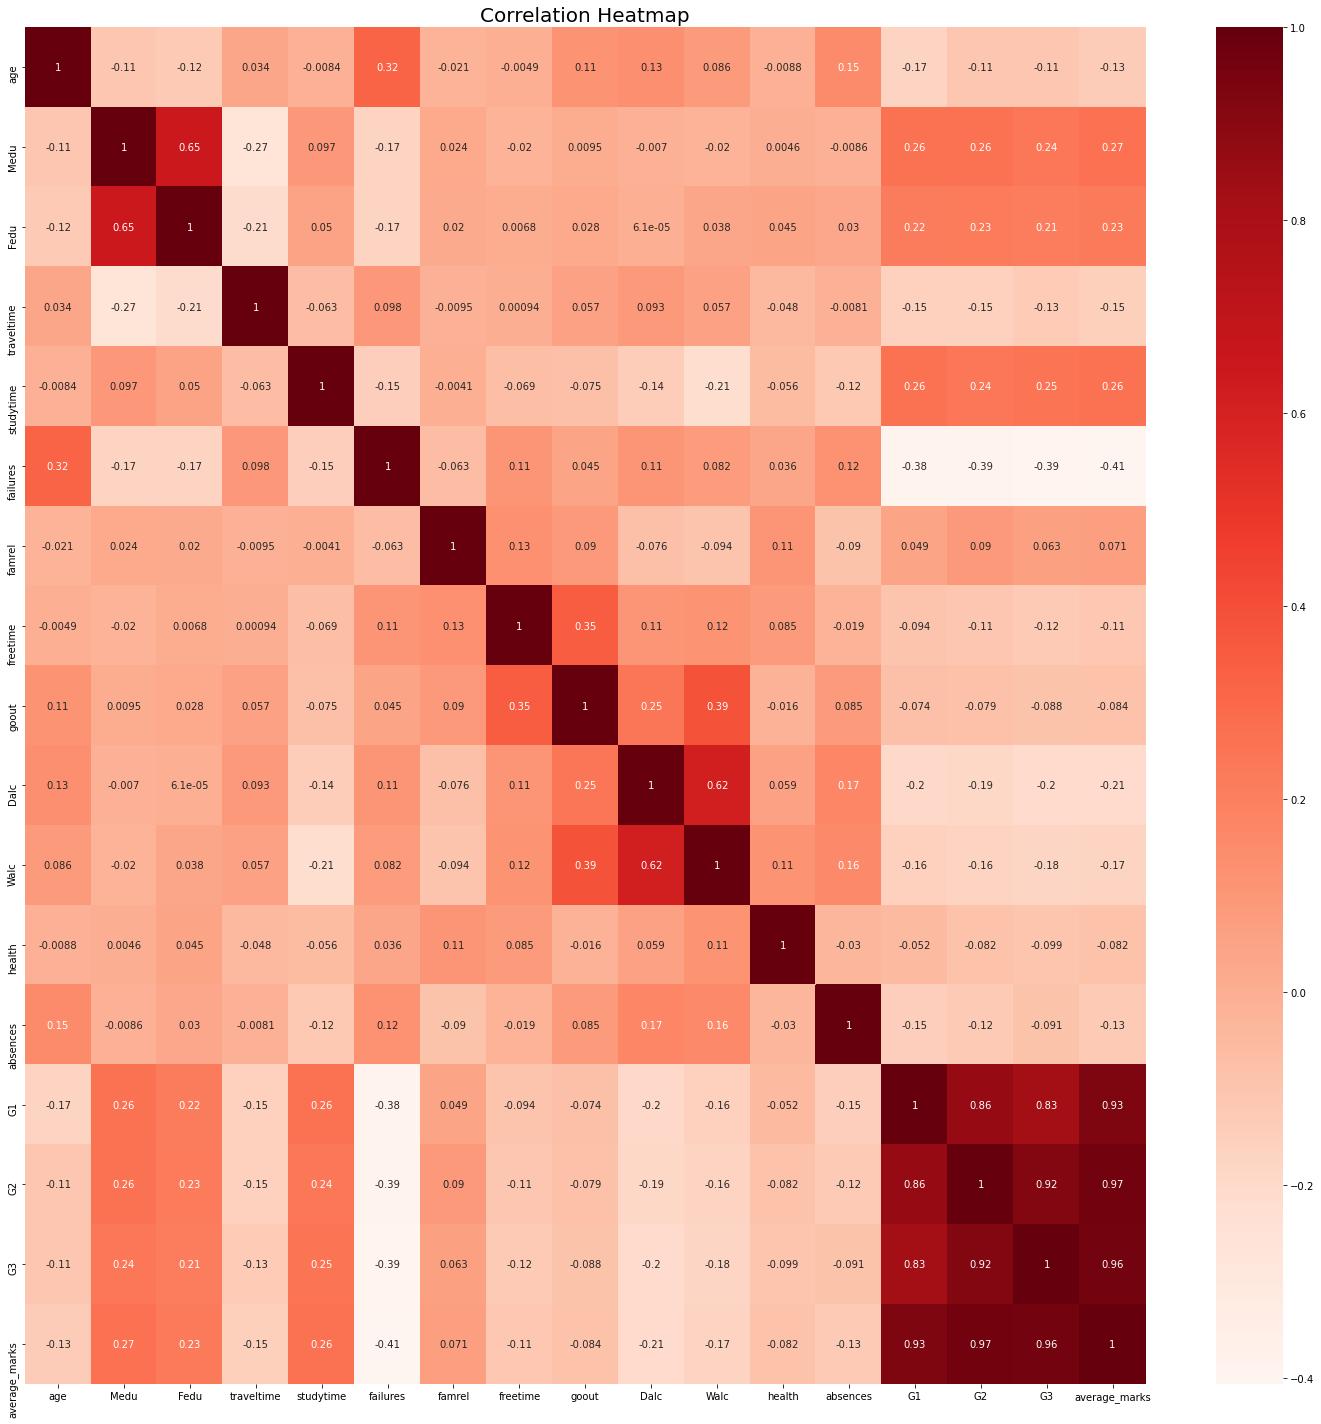

In [35]:
plt.figure(figsize = (20, 20))
sns.heatmap(correlation, annot = True, cmap = "Reds")
plt.title("Correlation Heatmap", fontsize = 20)
plt.tight_layout()
plt.show()